<a href="https://colab.research.google.com/github/Patittaoliver/Missao-II/blob/main/C%C3%B3pia_de_Aula_ML_Pretalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de imagem


In [ ]:
!wget https://noticiapreta.com.br/wp-content/uploads/2022/03/IMG_6906-2048p.png

## Classificação de imagem, como fazer?

  **image-classification:** Queremos que ele classifique (diga o que é) imagens

  **google/vit-base-patch32-384:** Este é o nome do "cérebro" que vai fazer o trabalho (um modelo chamado Vision Transformer)

  **device=0:** Usa a placa de vídeo do computador para trabalhar mais rápido

 **vit-base-patch32-384:** Analisa em pedaços de 32x32 pixels (um pouco menos detalhado, mas mais rápido)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from PIL import Image


pipe = pipeline("image-classification", model="google/vit-base-patch32-384", device=0)

In [ ]:
imagem = Image.open("IMG_6906-2048p.png")
res = pipe(imagem)

res


*   {'label': 'peruca', 'score': 0.16841420531272888},
*   {'label': 'estufa, viveiro, casa de vegetação', 'score': 0.035185057669878006},

*   {'label': 'maiô (roupa de banho)', 'score': 0.029690973460674286},
*   {'label': 'camiseta, t-shirt', 'score': 0.027683282271027565},
*   {'label': 'vaso (de planta)', 'score': 0.026298288255929947}





    

##Análise Técnica dos Pipelines de Visão Computacional

Pipeline de Detecção de Objetos (facebook/detr-resnet-50)
Arquitetura:

    Modelo Base: DETR (Detection Transformer) - uma abordagem transformer para detecção de objetos

    Backbone: ResNet-50 - rede convolucional para extração de features

    Mecanismo de Atenção: Transformer encoder-decoder

Funcionamento Técnico:

  Pré-processamento:

    Redimensionamento para resolução padrão (ex: 800px no lado maior)

    Normalização dos valores de pixel (média=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

  Extração de Features:

    A ResNet-50 processa a imagem gerando um feature map de baixa resolução espacial mas alta dimensionalidade (2048 canais)

  Transformer:

    O encoder transforma os features em uma representação contextualizada

    O decoder usa "object queries" para produzir um conjunto fixo de predições (100 por padrão)

  Predição:

    Saída é um conjunto de triplas (class, bounding box, confidence score)

    Função de perdo: bipartite matching loss combinando classificação e regressão de bbox

Pipeline de Classificação de Imagens (google/vit-base-patch16-224)
Arquitetura:

    Modelo: Vision Transformer (ViT)

    Patch Size: 16x16 pixels

    Input Resolution: 224x224 pixels

Funcionamento Técnico:

    Patch Embedding:

        Divide a imagem em N patches de 16x16 (N = (224/16)² = 196)

        Projeta cada patch para um espaço latente de D=768 dimensões

    Positional Encoding:

        Adiciona informação posicional aos embeddings

    Transformer Encoder:

        12 camadas de self-attention

        Hidden size: 768

        MLP size: 3072

        Heads de atenção: 12

    Classificação:

        Usa o token [CLS] para predição

        Camada linear final mapeia para espaço de classes (1000 no ImageNet)

In [ ]:
# Pipeline para detecção de objetos/pessoas + contexto
detector = pipeline("object-detection", model="facebook/detr-resnet-50")
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

detector = pipeline("object-detection", model="facebook/detr-resnet-50")

    O que faz? Cria um "detetive visual" que identifica objetos e pessoas em fotos

    Como funciona?

        Analisa a imagem e desenha caixinhas em volta de tudo que encontra

        Diz o que é cada coisa (ex.: "carro", "pessoa", "cachorro")

        Mostra a posição de cada objeto na foto

    Modelo usado: facebook/detr-resnet-50 (criado pelo Facebook)

        É bom para encontrar vários objetos de uma vez

        Reconhece cerca de 80 tipos diferentes de coisas

classifier = pipeline("image-classification", model="google/vit-base-patch16-224")
    O que faz? Cria um "especialista em fotos" que tenta entender a imagem toda

    Como funciona?

        Olha a foto como um todo

        Diz do que provavelmente se trata (ex.: "praia", "festa", "retrato")

        Dá uma nota de 0 a 1 de quanto tem certeza

    Modelo usado: google/vit-base-patch16-224 (criado pelo Google)

        Divide a imagem em quadradinhos pequenos (16x16 pixels) para análise

        Reconhece mais de 1.000 categorias diferentes

Como Seria Usar Isso Juntos?

    Primeiro o detector encontra todos os objetos:

        Ex.: [{"label":"pessoa","box":[x1,y1,x2,y2],"score":0.98}, ...]

    Depois o classifier analisa o contexto geral:

        Ex.: [{"label":"praia","score":0.92}, {"label":"férias","score":0.87}]

In [ ]:
# Analisar imagem
imagem = "IMG_6906-2048p.png"
detections = detector(imagem)  # Detecta pessoas e objetos
person_bbox = [d for d in detections if d['label'] == 'person'][0]  # Pega a pessoa principal

detections:

    É uma lista de dicionários contendo todas as detecções de objetos encontradas pelo modelo

    Cada item tem a estrutura: {'label': classe, 'box': [coordenadas], 'score': confiança}

List Comprehension:

    [d for d in detections if d['label'] == 'person'] cria uma nova lista contendo apenas as detecções onde o 'label' é 'person'

Índice [0]:

    Seleciona o primeiro elemento da lista filtrada (a pessoa com maior confiança, assumindo que as detecções estão ordenadas por score)

Em modelos de detecção de objetos como o **DETR ou YOLO,** **label** (etiqueta/rotulo em português) refere-se à classe/categoria que o modelo atribuiu a um objeto detectado na imagem. É uma string que identifica o tipo de objeto reconhecido.
<br>
<br>
<br>
**Uma definição não técnica:**

Imagine que você está olhando para uma foto cheia de coisas diferentes: pessoas, carros, árvores, animais etc. Um "label" é como um "nome" ou "etiqueta" que o computador coloca em cada coisa que ele reconhece na imagem.
Exemplo Prático:

Se o computador vê uma foto sua com um cachorro, ele pode identificar e "rotular" as coisas assim:

    "person" → onde você está na foto

    "dog" → em cima do cachorro

    "chair" → em volta de uma cadeira que aparecer

É como se o computador dissesse:
"Ah, aqui tem uma pessoa, aqui um cachorro, e ali atrás uma cadeira."

In [ ]:
result = classifier("IMG_6906-2048p.png")  # Classifica a pessoa
print(result)

In [ ]:
result = classifier("IMG_6906-2048p.png")

print("\n🔍 Resultados da Classificação:")
print("=" * 40)
for item in result:
    print(f"🏷️ {item['label'].upper():<30} | 📊 {item['score']*100:.2f}%")
print("=" * 40)

**O \n** significa "new line" ou "line-feed", ou seja, "nova linha"

classifier("IMG_6906-2048p.png")

    Usa um modelo de IA pré-treinado (como o ViT ou ResNet) para analisar a imagem.

    Retorna uma lista de dicionários, onde cada um tem:

        'label': Nome da classe detectada (ex.: 'dog').

        'score': Confiança do modelo (de 0 a 1, onde 1 = 100% certeza).

Formatação do Print

    for item in result: Passa por cada item detectado.

    item['label'].upper(): Transforma o rótulo em MAIÚSCULAS (ex.: 'dog' → 'DOG').

    :<30: Alinha o texto à esquerda com 30 espaços (para organizar as colunas).

    item['score']: Valor da confiança (ex.: 0.98).

    *100: Converte para porcentagem (ex.: 98.0).

    :.2f:

        .2 → Mostra 2 casas decimais.

        f → Formata como float (número decimal).

        Exemplo: 0.9823 → 98.23%.

Você mostrou uma foto para um especialista em imagens e ele vai te dizer o que ele enxerga, com um "nível de certeza" para cada coisa. Esse código faz isso:

    Pergunta ao especialista: "O que tem nessa foto?" (classifier("IMG_6906-2048p.png"))

    Recebe a resposta: Uma lista com coisas que ele reconheceu e o quanto ele acredita estar certo (ex.: "98% de chance de ser um cachorro").

    Mostra bonitinho no computador:

        Cada coisa que ele achou vira uma linha com um rótulo (ex.: CACHORRO) e uma porcentagem (ex.: 98.00%).

        Usa símbolos (🏷️, 📊) e tracinhos (====) para ficar organizado.

## Vamos treinar Imagens

In [ ]:
pip install torch torchvision matplotlib

In [ ]:
import os

path = "/content/drive/MyDrive/Projeto ML/Dataset-img"
print(os.listdir(path))

##**import os**

    Explorar pastas do computador.

    Criar/renomear/apagar arquivos.

    Controlar o sistema operacional (Windows, Mac, Linux).

É como dar ao Python uma chave mestra para acessar tudo no seu computador!

In [ ]:
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Primeiro, vamos organizar suas imagens na estrutura correta
def organize_images(source_dir, target_dir, class_name):
    os.makedirs(os.path.join(target_dir, class_name), exist_ok=True) #Cria a pasta de destino (se não existir):

    for img_file in os.listdir(source_dir): #Percorre todos os arquivos na pasta original:
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.avif')): #Verifica se é imagem
            src = os.path.join(source_dir, img_file) # Caminho original
            dst = os.path.join(target_dir, class_name, img_file) # Caminho novo
            shutil.copy(src, dst) # Copia (não move)

# Caminhos (ajuste conforme seu ambiente)
source_dir_brancas = '/content/drive/MyDrive/Projeto ML/Dataset-img/mulher-branca'
source_dir_pretas = '/content/drive/MyDrive/Projeto ML/Dataset-img/mulher-preta'
target_dir = '/content/dataset_organizado'

# Organizando as imagens
"""
source_dir_brancas

O que é?
É uma variável que armazena o caminho (path) do diretório onde estão armazenadas as imagens originais de mulheres brancas ou pretas.

os.path.join()

O que é?
É uma função do módulo os que combina partes de um caminho de forma correta para qualquer sistema operacional.

target_dir

O que é?
É a variável que armazena o caminho do diretório principal onde as imagens organizadas serão armazenadas.
"""
organize_images(source_dir_brancas, os.path.join(target_dir, 'treinamento'), 'brancas')

# 2. Agora o treinamento
IMG_SIZE = (224, 224)
BATCH_SIZE = 8  # Reduzi porque tem poucas imagens
EPOCHS = 15 # Uma passagem completa por todo o conjunto de treinamento.

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normaliza os valores dos pixels para [0,1]
    validation_split=0.2, # Reserva 20% dos dados para validação
    rotation_range=20, # Rotaciona imagens aleatoriamente até 20 graus
    width_shift_range=0.2, # Desloca imagem horizontalmente (20% da largura)
    height_shift_range=0.2, # Desloca imagem verticalmente (20% da altura)
    horizontal_flip=True # Inverte imagem horizontalmente aleatoriamente
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'), # Pasta com imagens
    target_size=IMG_SIZE,   # Redimensiona imagens
    batch_size=BATCH_SIZE,  # Número de imagens por lote
    class_mode='binary',  # Classificação binária
    subset='training' # Usa parte de treino (80%)
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Usa parte de validação (20%)
)

# Modelo simples
# Definição da arquitetura do modelo
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2), # Redução de dimensionalidade
    Conv2D(64, (3, 3), activation='relu'),  # Segunda camada convolucional
    MaxPooling2D(2, 2),
    Flatten(), # Preparação para camadas densas(Transforma matriz em vetor)
    Dense(128, activation='relu'), # Camada densa (fully connected)
    Dense(1, activation='sigmoid') # Camada de saída (classificação binária)
])

# Configuração do processo de treinamento
model.compile(
    optimizer='adam',  # Otimizador eficiente
    loss='binary_crossentropy', # Função de perda para classificação binária
    metrics=['accuracy'] # Métrica a ser monitorada
)

# Treinamento
history = model.fit(
    train_generator, # Dados de treino
    validation_data=validation_generator, # Dados de validação
    epochs=EPOCHS # Número de épocas
)


# Salvar modelo
model.save('modelo_classificacao_racial.h5')

##import shutil

**Não técnico:**
É como uma "tesoura e cola" digital para manipular arquivos e pastas no computador.
<br>
<br>

**Técnico:**

    Módulo para operações de alto nível em arquivos

    Funções úteis:

        shutil.copy() - copia arquivos

        shutil.move() - move arquivos

        shutil.rmtree() - remove diretórios recursivamente

##import tensorflow as tf

**Não técnico:**
É a "caixa de ferramentas" principal para inteligência artificial que vamos usar.
<br>
<br>

**Técnico:**

    Biblioteca open-source para machine learning

    Fornece:

        Operações matemáticas aceleradas por GPU

        Abstrações para redes neurais

        Suporte para treinamento distribuído

##from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Não técnico:**
Um "assistente" que prepara imagens para o treinamento, podendo até criar variações delas automaticamente.
<br>
<br>
**Técnico:**

    Gera batches de dados de imagem tensor com aumento de dados em tempo real

    Funcionalidades:

        Redimensionamento

        Normalização

        Aumento de dados (data augmentation)

        Fluxo de dados direto do disco

##from tensorflow.keras.models import Sequential

**Não técnico:**
Permite criar modelos de IA como se estivéssemos empilhando blocos de Lego.
<br>
<br>
**Técnico:**

    API sequencial para construção de modelos

    Permite adicionar camadas uma após a outra

    Modelo linear de empilhamento de camadas

##Importações de Camadas

**Não técnico:**
Diferentes "ferramentas de construção" para nossa rede neural.
<br>
<br>
**Técnico:**

    Conv2D: Camada convolucional para extrair características de imagens

        Filtros que detectam padrões locais

    MaxPooling2D: Reduz a dimensionalidade espacial

        Mantém características importantes

    Flatten: Transforma dados 2D em 1D

        Prepara para camadas densas

    Dense: Camada totalmente conectada

        Para classificação final

**os.makedirs()**

O que faz?
Cria uma pasta (diretório) no caminho especificado, incluindo subpastas necessárias (caso não existam).

Parâmetros:

    **os**.path.join(): Combina partes do caminho (ex: "dados/train" + "cachorros" → "dados/train/cachorros").

    exist_ok=True: Evita erros se a pasta já existir (ignora silenciosamente).

Exemplo:
Se target_dir = "dados" e class_name = "cachorros"

**os.listdir()**

O que faz?
Lista todos os arquivos e pastas dentro de um diretório (source_dir).

Retorno:
Uma lista com nomes de arquivos (ex: ["img1.jpg", "img2.png", "notas.txt"]).

**str.lower() e str.endswith()**

O que faz?

    img_file.lower(): Converte o nome do arquivo para minúsculas (ex: "IMG.JPG" → "img.jpg").

    .endswith(): Verifica se o arquivo termina com alguma das extensões listadas.

Por quê?
Garante que extensões como .JPG ou .jpg sejam tratadas igualmente.

**os.path.join()**

O que faz?
Combina partes de um caminho de forma correta para o sistema operacional (Windows/Linux/Mac).

**shutil.copy()**

O que faz?
Copia o arquivo de src (origem) para dst (destino) sem alterar o original.

Diferença para shutil.move():

    copy(): Cria uma cópia (original permanece).

    move(): Corta e cola (original é removido).

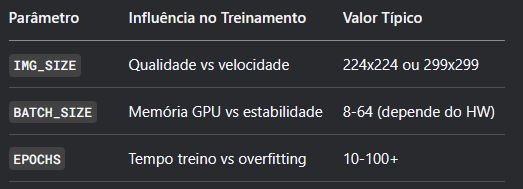

Data Augmentation (Aumento de Dados)

O ImageDataGenerator cria variações artificiais das imagens para:

    Prevenir overfitting: Faz o modelo generalizar melhor

    Aumentar dataset: Gera "novas" imagens a partir das existentes

    Normalização: Redimensiona valores dos pixels para 0-1 (rescale=1./255)

Técnicas aplicadas:

    Rotações (20°): ajuda o modelo a reconhecer objetos em diferentes ângulos

    Deslocamentos (20%): torna o modelo robusto a posições variadas

    Flip horizontal: útil para objetos simétricos como rostos

2. Geradores de Dados

Os geradores (flow_from_directory):

    Leem imagens diretamente do disco: eficiente em memória

    Dividem automaticamente em treino/validação (80/20%)

    Organização esperada:

Arquitetura CNN

Modelo Sequencial com:

    Camadas Convolucionais:

        Conv2D: Extrai features locais (32 e 64 filtros)

        MaxPooling2D: Reduz dimensionalidade mantendo features importantes

    Camadas Densas:

        Flatten: Prepara para camadas fully connected

        Dense(128): Camada intermediária com 128 neurônios

        Dense(1): Saída binária (sigmoid para probabilidade 0-1)

4. Compilação do Modelo

    Optimizer 'adam': Adapta taxa de aprendizado automaticamente

    Binary crossentropy: Função de perda ideal para 2 classes

    Accuracy: Métrica principal para avaliação

5. Treinamento

    Epocas (EPOCHS): Passagens completas pelo dataset

    Validação: Monitora desempenho em dados não vistos

    History: Armazena métricas para visualização posterior

Fluxo Completo

    Pré-processa e aumenta imagens automaticamente

    Cria modelo CNN simples mas eficaz

    Treina monitorando validação

    Saída: modelo capaz de classificar novas imagens

Este pipeline é amplamente utilizado em problemas básicos de classificação de imagens, sendo fácil de adaptar para diferentes casos!

In [ ]:
# Importa a arquitetura MobileNetV2 pré-treinada
from tensorflow.keras.applications import MobileNetV2

# Carrega o modelo base MobileNetV2 com pesos pré-treinados no ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Usa pesos treinados no ImageNet(Remove a última camada (classificação original e define o formato de entrada das imagens)
base_model.trainable = False # Os pesos não serão atualizados durante o treino

# Cria um novo modelo sequencial
model = Sequential([
    base_model,  # Extrai features das imagens
    Flatten(), # Transforma os features em vetor
    Dense(128, activation='relu'), # Adiciona capacidade de aprendizado
    Dense(1, activation='sigmoid') # Saída entre 0 e 1 (probabilidade)
])

Explicação Detalhada
1. MobileNetV2 Pré-treinado

    O que é? Uma rede neural eficiente projetada para dispositivos móveis

    Pré-treinamento: Já aprendeu a extrair features de 1.4 milhão de imagens (ImageNet)

    Parâmetros:

        weights='imagenet': Carrega pesos otimizados

        include_top=False: Remove as camadas finais de classificação

        input_shape=(224,224,3): Espera imagens coloridas 224x224 pixels

2. Congelamento do Modelo Base

    base_model.trainable = False:

        Mantém os pesos originais inalterados

        Acelera o treinamento (só treina novas camadas adicionadas)

        Evita "destruir" os padrões já aprendidos

3. Arquitetura Personalizada

    Extração de Features:

        MobileNetV2 processa a imagem e extrai características complexas

    Flatten():

        Transforma a saída 3D (7x7x1280) em 1D (62720 valores)

        Prepara para camadas densas

    Camada Dense (128 neurônios):

        Aprende combinações não-lineares dos features

        Função ReLU (Rectified Linear Unit) para ativação

    Camada de Saída:

        1 neurônio com sigmoid (classificação binária)

        Saída entre 0-1 (probabilidade da classe positiva)

Vantagens desta Abordagem

    Eficiência:

        Reutiliza conhecimento pré-treinado

        Requer menos dados para treinamento

    Desempenho:

        MobileNetV2 é otimizado para velocidade

        Boa acurácia mesmo com poucos dados

    Flexibilidade:

        Fácil adaptação para diferentes problemas

        Pode adicionar mais camadas se necessário

Quando Usar?

    Problemas com datasets pequenos/médios

    Quando se precisa de bom desempenho com baixo poder computacional

    Para classificação binária ou multi-classe (ajustando a camada final)

Fluxo de Processamento

In [ ]:
from PIL import Image

# Carregar o modelo treinado
model = load_model('modelo_classificacao_racial.h5')  # Ou use o caminho correto

# Função para processar imagem da internet
  """Classifica uma imagem obtida por URL usando o modelo treinado

    Args:
        img_url (str): URL da imagem a ser classificada

    Returns:
        dict or None: Resultados da classificação ou None em caso de erro
    """
def test_image_from_url(img_url):
    try:
        # Baixar a imagem
        response = requests.get(img_url) # Timeout de 10 segundos
        img = Image.open(BytesIO(response.content)) # Verifica erros HTTP

        # Converte para RGB caso seja PNG, RGBA, etc.
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Mostrar a imagem original
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Imagem Original')
        plt.show()

        # Pré-processamento
        img = img.resize((224, 224)) # Redimensiona para o tamanho esperado pelo modelo
        img_array = image.img_to_array(img) # Converte para array numpy
        img_array = np.expand_dims(img_array, axis=0) # Adiciona dimensão do batch
        img_array /= 255.0  # Normaliza pixels para [0,1]

        # Fazer a predição
        prediction = model.predict(img_array) # Suprime logs
        prob_branca = 1 - prediction[0][0] # Probabilidade da classe 'preta'
        prob_preta = prediction[0][0] # Probabilidade complementar

        # Determinar a classe
        if prob_branca > prob_preta:
            classe = "Branca"
            confidence = prob_branca
        else:
            classe = "Preta"
            confidence = prob_preta

        # Mostrar resultados
        print("\nResultado da Classificação:")
        print(f"Classe Predita: {classe}")
        print(f"Confiança: {confidence:.2%}")
        print(f"Probabilidade Branca: {prob_branca:.2%}")
        print(f"Probabilidade Preta: {prob_preta:.2%}")

        return {
            'class': classe,
            'confidence': float(confidence),
            'probabilities': {
                'branca': float(prob_branca),
                'preta': float(prob_preta)
            }
        }

    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")
        return None

# Exemplos de URLs para testar (substitua por URLs reais)
test_urls = [
    "https://www.minhavidamagnolia.com.br/wp-content/uploads/2024/07/Branca-Rubas-apresenta-o-Inspira-Mulher-Business-Club.png",  # URL de mulher branca
    "https://paesadvogados.com.br/wp-content/uploads/2022/05/pardo.jpg",   # URL de mulher preta

]

# Testar cada URL
for url in test_urls:
    print(f"\nTestando imagem: {url}")
    result = test_image_from_url(url)
    if result:
        print(f"Resultado: {result['class']} (Confiança: {result['confidence']:.2%})")

Fluxo da Função

    Download Seguro: Adicionado timeout e tratamento de erros HTTP

    Conversão Robusta: Garante que todas as imagens estejam no formato RGB

    Visualização: Mostra a imagem antes da classificação

    Pré-processamento:

        Redimensionamento para 224x224px

        Normalização dos valores dos pixels

    Predição:

        Usa o modelo treinado

        Calcula probabilidades para ambas as classes

    Resultados:

        Exibe informações formatadas

        Retorna dados estruturados

2. Melhorias Implementadas

    Tratamento de Erros: Específico para problemas de download e genérico para outros erros

    Visualização: Tamanho maior e título descritivo

    Saída Formatada: Usa emojis e formatação para melhor legibilidade

    Controle de Logs: Suprime mensagens do TensorFlow (verbose=0)

    Progresso: Mostra contagem de testes (ex: "Teste 1/2")

Boas Práticas Incluídas

    Docstring: Documentação da função

    Timeout: Evita travamento em URLs problemáticas

    Tipagem Implícita: Nomes de variáveis descritivos

    Resiliência: Conversão obrigatória para RGB

    Visualização: Ajuda no debug e análise